# Exploratory Data Analysis

## Import necessary packages

In [8]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


## Constants

In [22]:
RANDOM_SEED = 0
TRAIN_DATASET_PATH = "train.pkl"
VALIDATION_DATASET_PATH = "valid.pkl"
TEST_DATASET_PATH = "test.pkl"

STOPWORDS_ENGLISH_PATH = "stopwords/english"
STOPWORDS_TAGALOG_PATH = "stopwords/tagalog"

## Load the Hate Speech Filipino dataset

In [10]:
def load_from_file(file_path):
        try:
            with open(file_path, "rb") as f:
                X, Y = pickle.load(f)
                print(f"Data loaded from {file_path}")
                return X, Y
        except FileNotFoundError:
            print("File not found. Please check the path or pull the dataset first.")
            return None, None

In [11]:
X_train, Y_train = load_from_file(TRAIN_DATASET_PATH)
X_val, Y_val = load_from_file(VALIDATION_DATASET_PATH)
X_test, Y_test = load_from_file(TEST_DATASET_PATH)

Data loaded from train.pkl
Data loaded from valid.pkl
Data loaded from test.pkl


In [12]:
# Count lengths of each set
print(len(X_train))
print(len(Y_train))
print(len(X_val))
print(len(Y_val))
print(len(X_test))
print(len(Y_test))

10000
10000
4232
4232
4232
4232


## Convert to pandas dataframes and inspect

In [34]:
train_df = pd.DataFrame(
    {'tweet': X_train,
     'label': Y_train
    })

train_df.head()

,tweet,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [15]:
val_df = pd.DataFrame(
    {'tweet': X_val,
     'label': Y_val
    })

val_df.head()

,tweet,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,perfect! Para makaharap ni Duterte ang mga Bi...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0


In [16]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4232 non-null   object
 1   label   4232 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.3+ KB


In [17]:
test_df = pd.DataFrame(
    {'tweet': X_test,
     'label': Y_test
    })

test_df.head()

,tweet,label
0,Unshaded votes and votes for Mayor Duterte goe...,1
1,#NoMoreChance,1
2,well there's other good choices like Duterte ...,0
3,Nognog. Pandak. Laki sa hirap. Pero corrupt. Y...,1
4,Ex-Binay aide turns tables on Mercado |,0


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4232 non-null   object
 1   label   4232 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.3+ KB


## Hate Speech Count per Set

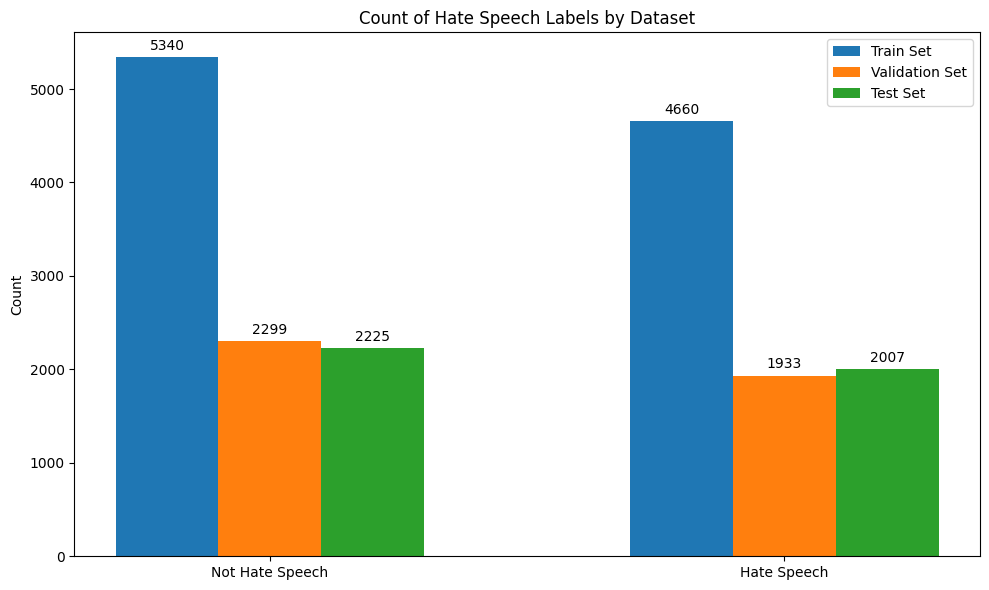

In [19]:
# Count occurrences of 0s and 1s for each set
train_counts = train_df['label'].value_counts()
validation_counts = val_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

# Plotting
labels = ['Not Hate Speech', 'Hate Speech']
x = np.arange(len(labels))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each set
train_bars = ax.bar(x - width, train_counts, width, label='Train Set', color='tab:blue')
validation_bars = ax.bar(x , validation_counts, width, label='Validation Set', color='tab:orange')
test_bars = ax.bar(x + width, test_counts, width, label='Test Set', color='tab:green')

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Hate Speech Labels by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_bars)
add_labels(validation_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()

## Add Length and Word Counts to Train Set

In [35]:
train_df['Length'] = train_df['tweet'].apply(len)
train_df['Word_counts'] = train_df['tweet'].apply(lambda x:len(str(x).split()))

train_df.head()

,tweet,label,Length,Word_counts
0,Inaasahan na ni Vice President Jejomar Binay n...,0,65,11
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,62,14
2,Salamat sa walang sawang suporta ng mga taga m...,0,110,15
3,putangina mo binay TAKBO PA,1,28,5
4,"Binay with selective amnesia, forgetting about...",0,124,17


## Remove stop words

In [36]:
# Function to read stopwords from file and save into a list
def read_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_list = [word.strip() for word in file.readlines()]
    return stopwords_list


# Read English stopwords
english_stopwords = read_stopwords(STOPWORDS_ENGLISH_PATH)

# Read Tagalog stopwords
tagalog_stopwords = read_stopwords(STOPWORDS_TAGALOG_PATH)


def filter_stopwords(tweet, stopwords):
    words = tweet.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Filter train_df for English stopwords
train_df['filtered_tweets_english'] = train_df['tweet'].apply(lambda x: filter_stopwords(x, english_stopwords))

# Filter train_df for Tagalog stopwords
train_df['filtered_tweets_english_tagalog'] = train_df['filtered_tweets_english'].apply(lambda x: filter_stopwords(x, tagalog_stopwords))

# Display the filtered DataFrame
print("Filtered tweets for English stopwords:")
print(train_df['filtered_tweets_english'][:5])
print("\nFiltered tweets for Tagalog stopwords:")
print(train_df['filtered_tweets_english_tagalog'][:5])

Filtered tweets for English stopwords:
0    Inaasahan na ni Vice President Jejomar Binay n...
1    Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...
2    Salamat sa walang sawang suporta ng mga taga m...
3                          putangina mo binay TAKBO PA
4    Binay selective amnesia, forgetting past six y...
Name: filtered_tweets_english, dtype: object

Filtered tweets for Tagalog stopwords:
0      Inaasahan Vice President Jejomar Binay taong...
1    Mar Roxas TANG INA TUWID DAAN DAW .. EH SYA NG...
2    Salamat sawang suporta taga makati! Pagbabalik...
3                             putangina mo binay TAKBO
4    Binay selective amnesia, forgetting past six y...
Name: filtered_tweets_english_tagalog, dtype: object


In [37]:
train_df

,tweet,label,Length,Word_counts,filtered_tweets_english,filtered_tweets_english_tagalog
0,Inaasahan na ni Vice President Jejomar Binay n...,0,65,11,Inaasahan na ni Vice President Jejomar Binay n...,Inaasahan Vice President Jejomar Binay taong...
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1,62,14,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,Mar Roxas TANG INA TUWID DAAN DAW .. EH SYA NG...
2,Salamat sa walang sawang suporta ng mga taga m...,0,110,15,Salamat sa walang sawang suporta ng mga taga m...,Salamat sawang suporta taga makati! Pagbabalik...
3,putangina mo binay TAKBO PA,1,28,5,putangina mo binay TAKBO PA,putangina mo binay TAKBO
4,"Binay with selective amnesia, forgetting about...",0,124,17,"Binay selective amnesia, forgetting past six y...","Binay selective amnesia, forgetting past six y..."
...,...,...,...,...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0,121,17,"Mar Roxas rise, w/ momentum, machinery, grassr...","Mar Roxas rise, w/ momentum, machinery, grassr..."
9996,,1,0,0,,
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0,96,13,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...","Alan Cayetano 'confirms' Palace, Roxas, Poe be..."
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1,41,8,Mas nakakainis ad ni Mar kaysa kay Binay.,Mas nakakainis ad Mar kay Binay.


## Clean text

In [44]:
import re 
import string

def clean_text(text):
    '''Make text lowercase, remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [46]:
train_df['tweet'] = train_df['tweet'].apply(lambda x:clean_text(x))
train_df['filtered_tweets_english'] = train_df['filtered_tweets_english'].apply(lambda x:clean_text(x))
train_df['filtered_tweets_english_tagalog'] = train_df['filtered_tweets_english_tagalog'].apply(lambda x:clean_text(x))
train_df.head()

,tweet,label,Length,Word_counts,filtered_tweets_english,filtered_tweets_english_tagalog,temp_list
0,inaasahan na ni vice president jejomar binay n...,0,65,11,inaasahan na ni vice president jejomar binay n...,inaasahan vice president jejomar binay taong,"[inaasahan, vice, president, jejomar, binay, t..."
1,mar roxas tang ina tuwid na daan daw eh sya n...,1,62,14,mar roxas tang ina tuwid na daan daw eh sya n...,mar roxas tang ina tuwid daan daw eh sya nga ...,"[mar, roxas, tang, ina, tuwid, daan, daw, .., ..."
2,salamat sa walang sawang suporta ng mga taga m...,0,110,15,salamat sa walang sawang suporta ng mga taga m...,salamat sawang suporta taga makati pagbabalik ...,"[salamat, sawang, suporta, taga, makati!, pagb..."
3,putangina mo binay takbo pa,1,28,5,putangina mo binay takbo pa,putangina mo binay takbo,"[putangina, mo, binay, takbo]"
4,binay with selective amnesia forgetting about ...,0,124,17,binay selective amnesia forgetting past six ye...,binay selective amnesia forgetting past six ye...,"[binay, selective, amnesia,, forgetting, past,..."


## Plot most common words

### Overall

In [47]:
from collections import Counter

train_df['temp_list'] = train_df['filtered_tweets_english_tagalog'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,binay,5720
1,roxas,2958
2,mar,2490
3,si,2357
4,duterte,1195
5,poe,1033
6,lang,724
7,kay,718
8,vp,681
9,mo,666


In [51]:
train_df

,tweet,label,Length,Word_counts,filtered_tweets_english,filtered_tweets_english_tagalog,temp_list
0,inaasahan na ni vice president jejomar binay n...,0,65,11,inaasahan na ni vice president jejomar binay n...,inaasahan vice president jejomar binay taong,"[inaasahan, vice, president, jejomar, binay, t..."
1,mar roxas tang ina tuwid na daan daw eh sya n...,1,62,14,mar roxas tang ina tuwid na daan daw eh sya n...,mar roxas tang ina tuwid daan daw eh sya nga ...,"[mar, roxas, tang, ina, tuwid, daan, daw, eh, ..."
2,salamat sa walang sawang suporta ng mga taga m...,0,110,15,salamat sa walang sawang suporta ng mga taga m...,salamat sawang suporta taga makati pagbabalik ...,"[salamat, sawang, suporta, taga, makati, pagba..."
3,putangina mo binay takbo pa,1,28,5,putangina mo binay takbo pa,putangina mo binay takbo,"[putangina, mo, binay, takbo]"
4,binay with selective amnesia forgetting about ...,0,124,17,binay selective amnesia forgetting past six ye...,binay selective amnesia forgetting past six ye...,"[binay, selective, amnesia, forgetting, past, ..."
...,...,...,...,...,...,...,...
9995,mar roxas on the rise w momentum machinery gra...,0,121,17,mar roxas rise w momentum machinery grassroots...,mar roxas rise w momentum machinery grassroots...,"[mar, roxas, rise, w, momentum, machinery, gra..."
9996,,1,0,0,,,[]
9997,alan cayetano confirms palace roxas poe behind...,0,96,13,alan cayetano confirms palace roxas poe behind...,alan cayetano confirms palace roxas poe behind...,"[alan, cayetano, confirms, palace, roxas, poe,..."
9998,mas nakakainis ad ni mar kaysa kay binay,1,41,8,mas nakakainis ad ni mar kaysa kay binay,mas nakakainis ad mar kay binay,"[mas, nakakainis, ad, mar, kay, binay]"


### Tweets with Hate Speech

In [48]:
hate_df = train_df.loc[train_df['label'] == 1,:]

hate_df['temp_list'] = hate_df['filtered_tweets_english_tagalog'].apply(lambda x:str(x).split())
top = Counter([item for sublist in hate_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

/var/folders/dk/zhw4_3kn6cb029559dwjrmt40000gn/T/ipykernel_66491/2713324943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_df['temp_list'] = hate_df['filtered_tweets_english_tagalog'].apply(lambda x:str(x).split())


,Common_words,count
0,binay,2759
1,roxas,1484
2,si,1347
3,mar,1276
4,mo,485
5,duterte,476
6,lang,426
7,yung,401
8,poe,394
9,kay,368


### Tweets without Hate Speech

In [50]:
no_hate_df = train_df.loc[train_df['label'] == 0,:]

no_hate_df['temp_list'] = no_hate_df['filtered_tweets_english_tagalog'].apply(lambda x:str(x).split())
top = Counter([item for sublist in no_hate_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

/var/folders/dk/zhw4_3kn6cb029559dwjrmt40000gn/T/ipykernel_66491/4226680645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_hate_df['temp_list'] = no_hate_df['filtered_tweets_english_tagalog'].apply(lambda x:str(x).split())


,Common_words,count
0,binay,2961
1,roxas,1474
2,mar,1214
3,si,1010
4,duterte,719
5,poe,639
6,vp,510
7,kay,350
8,rt,337
9,lang,298
